In [4]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from joblib import dump, load

# Load dataset
df = pd.read_csv("data/iris.csv")

# Extract features (X) and labels (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
y = df['Species'].values

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Train the model
model = SVC(gamma="auto")
model.fit(X_train, y_train)

# Make predictions on validation dataset
predictions = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2f}")  # Print accuracy score

# Save model using joblib
dump(model, 'models/iris.joblib')

# Load model using joblib
model = load('models/iris.joblib')

# Get input from the user
try:
    sepal_length = float(input("Enter SepalLengthCm: "))
    sepal_width = float(input("Enter SepalWidthCm: "))
    petal_length = float(input("Enter PetalLengthCm: "))
    petal_width = float(input("Enter PetalWidthCm: "))
except ValueError:
    print("Invalid input. Please enter numeric values.")
    exit()

# Make a prediction
input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
result = model.predict(input_data)
print("Prediction:", result[0])  # Iris Classification with SVM

Model Accuracy: 0.97
Prediction: Iris-versicolor


Matplotlib is building the font cache; this may take a moment.


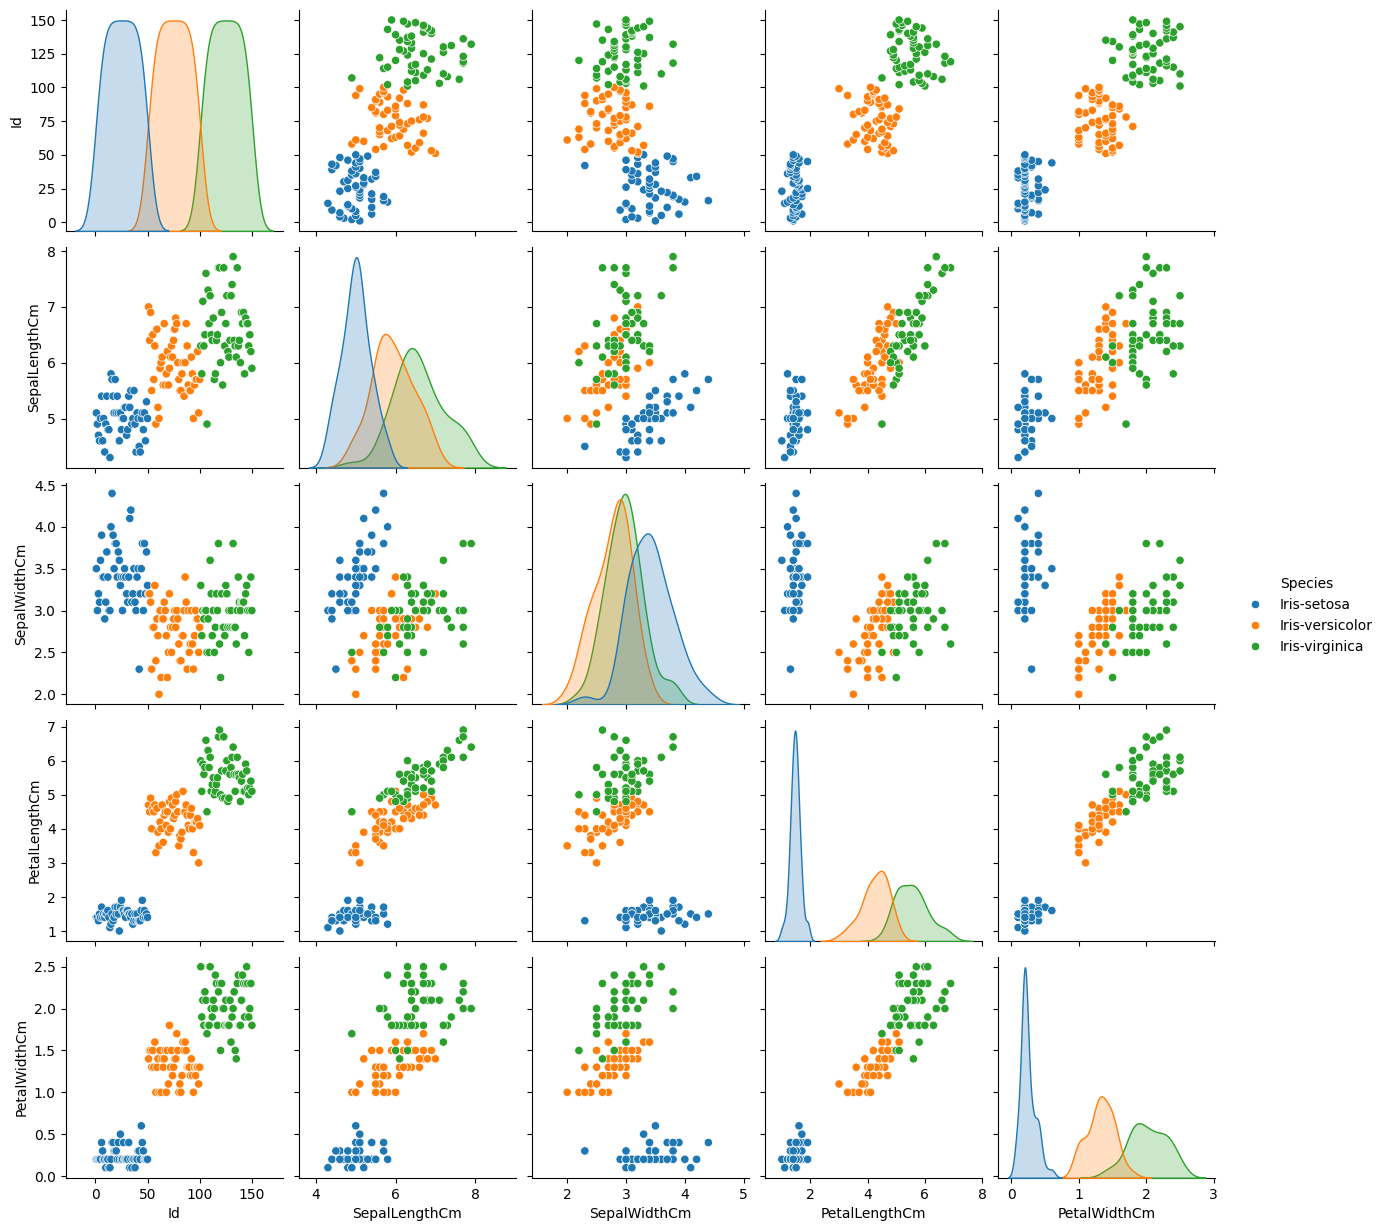

In [5]:
# Import Seaborn and Matplotlib for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between features
sns.pairplot(df, hue="Species", diag_kind="kde")
plt.show()